<a href="https://colab.research.google.com/github/jstangelbellarmine/MLA_JRS/blob/main/MLA5_JRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning Assignment 5

###CS-430-ON

John Stangel

##Ensemble Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Connect to Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#This section used to confirm I have correct files in my drive.
import os
os.listdir('/content/gdrive/MyDrive')

['Colab Notebooks',
 'weather_2012.csv',
 'Untitled document.gdoc',
 'March 2025 (6 Calendar Page).gdoc',
 'GaiaEye.zip',
 'buckthornImg.jpg',
 'Steel_industry_data.csv',
 'banknote_authentication.csv',
 'Untitled0.ipynb',
 'SkokieBuckthorn.jpg',
 'SkokieB.JPG',
 'FotoMapper.ipynb',
 'photo_location.kml',
 'Google Earth',
 'landsat_train.csv',
 'landsat_test.csv',
 'Malta.gdoc']

Imports for Ensemble Learning and Random Forests


##Imports for specific models, from [starter code](https://github.com/r2klabs/CS430Repository.git) provided by Bellarmine University.

This section imports the models from SKLearn.

In [4]:
from sklearn.svm import SVC, SVR
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

##Other Classifier

In [5]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


###Imports for Splitting Data and Building Pipeline


In [6]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [7]:
from sklearn import set_config
set_config(display='diagram')

###Imports for Performance Measures

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

###Confusion Matrix Function

This function is for creating a graphical version of the confusion matrix.

In [9]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='Greens')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

ROC_Curve Function
This function is for plotting the roc_curve

In [10]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

This section imports the code needed for data trees.

In [11]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

##Problem 1

This section acquires the data and creates two dataframes.

In [12]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/landsat_test.csv')

This section creates two bar plots for both landsat test and landsat train.

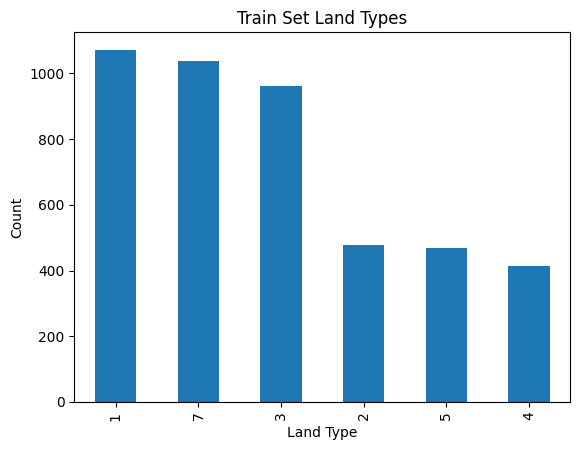

In [13]:
landsat_train['land_type'].value_counts().plot(kind='bar', title='Train Set Land Types')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

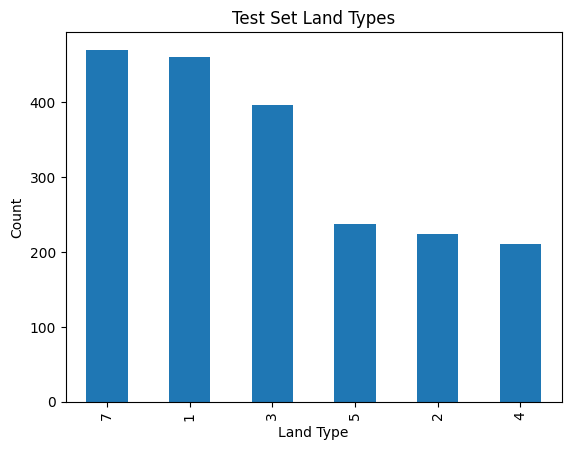

In [14]:
landsat_test['land_type'].value_counts().plot(kind='bar', title='Test Set Land Types')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

This section creates the split for train

In [15]:
X_train = landsat_train.drop(columns='land_type')
y_train = landsat_train[['land_type']]

This section creates the split for test

In [16]:
X_test = landsat_test.drop(columns='land_type')
y_test = landsat_test[['land_type']]

This section employs the midmax scaler. This doesn't include ColumnTransformer as the data is already numerical.

In [17]:
col_transform = ColumnTransformer([
    ('num', MinMaxScaler(), X_train.columns)
    ])

This section creates the random forest pipeline

In [18]:
rf_pipeline = Pipeline([
    ('transform', col_transform),
    ('rf', RandomForestClassifier(n_estimators=1000, max_samples=500, bootstrap=True, random_state=89))
    ])

Thos sectopm fots the pipeline to our

In [19]:
rf_pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_l...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('rf',
                 RandomForestClassifier(max_samples=500, n_estimators=1000,
                                        random_state=89))])

this section makes predictions based on my models

In [20]:
y_pred = rf_pipeline.predict(X_test)

This section uses the classification function to print metrics

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.99      0.96       461
           2       0.97      0.96      0.97       224
           3       0.87      0.95      0.91       397
           4       0.73      0.59      0.65       211
           5       0.91      0.77      0.83       237
           7       0.84      0.87      0.86       470

    accuracy                           0.88      2000
   macro avg       0.88      0.85      0.86      2000
weighted avg       0.88      0.88      0.88      2000



This section creates the confusion matrix

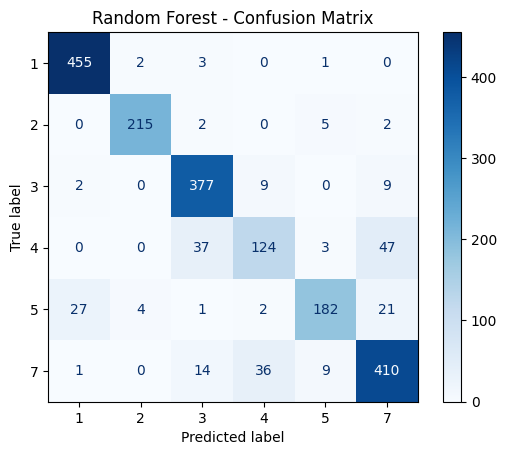

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

This model is very suitable for determining common land types but struggles with less common types. I say this because both 1 and 2 above have very high precision, recall, and f1 scores at    0.94      0.99      0.96   for set 1 and 0.97      0.96      0.97 for set 2 respectively.

If we were to look at other sets, like 4 (0.73      0.59      0.650) and to a degree 5 (0.91      0.77      0.83) we can see these numbers drop dramatically. this can be attributed in part to the lower instances in the support column. That doesn't explain how 2 had a small number of stances and still higher accuracey and recall, though.

##Problem 2

###I chose Bagging Classifier

This section creates a bagging pipeline.

In [23]:
bagging = Pipeline([
    ('transform', col_transform),
    ('bagging', BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=1000,
        max_samples=500,
        bootstrap=True,
        n_jobs=-1,
        random_state=35
      ))
      ])

This section fits the model to the pipeline.

In [24]:
bagging.fit(X_train, np.ravel(y_train))


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_l...
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('bagging',
                 BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   max_samples=500, n_estimators=1000,
                                   n_jobs=-1, random_state=35))])

Thgis section creates a dataframe and prints the classification report

In [25]:
y_pred = bagging.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.94      0.98      0.96       461
           2       0.99      0.95      0.97       224
           3       0.87      0.95      0.91       397
           4       0.69      0.57      0.63       211
           5       0.90      0.77      0.83       237
           7       0.83      0.86      0.85       470

    accuracy                           0.88      2000
   macro avg       0.87      0.85      0.86      2000
weighted avg       0.87      0.88      0.87      2000



This section shows the confusion matrix

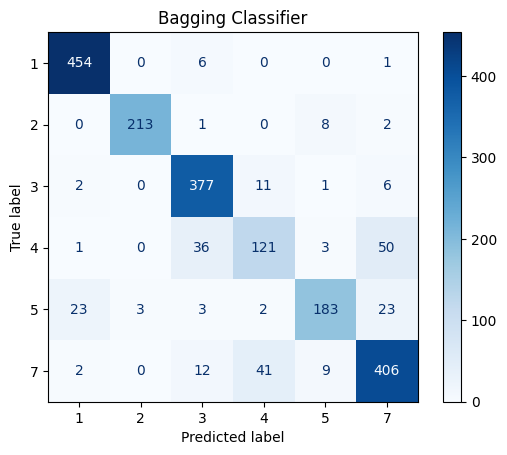

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Bagging Classifier")
plt.show()

This model shows strong reliability and usefulless in some situations but falls behind in others. For sets 1 (0.94      0.98      0.96), 2 (.99      0.95      0.97), and 3(0.87      0.95      0.91 ) the model works quite wqell, and is even a good choice for 7 ( 7       0.83      0.86      0.85) but it is woefully bad at set 4,  (4       0.69      0.57      0.63). I attribute this to a lack of data in set 4.


The average score ( 0.87      0.88      0.87) is slightly worse than the forest classification from problem 1 ( 0.87      0.88      0.87)

##Problem 3

This section loads the data

In [27]:
banknote = pd.read_csv('/content/gdrive/MyDrive/banknote_authentication.csv')
print(banknote.columns)

Index(['variance', 'skewness', 'curtosis', 'entropy', 'forgery'], dtype='object')


This section creates variables, x and y

In [28]:
X = banknote.drop(columns='forgery')
y = banknote[['forgery']]

This section splits the data into train/test with a 20/80 split.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

This section creates the text/train split with 80/20 split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=74)

this section creates the creates the pipeline and uses a minmax scaler with coluumn transofrmer.

In [31]:
col_transform = ColumnTransformer([
    ('num', MinMaxScaler(), X.columns)
])




rf_pipeline = Pipeline([
    ('transform', col_transform),
    ('rf', RandomForestClassifier(
        n_estimators=1000,
        max_samples=350,
        bootstrap=True,
        random_state=66
       ))
      ])

This next section fits the pipeline to the model

In [32]:
rf_pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('rf',
                 RandomForestClassifier(max_samples=350, n_estimators=1000,
                                        random_state=66))])

This section sets up my prediction

In [33]:
y_pred = rf_pipeline.predict(X_test)

This section prints the classification reports.

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       149
           1       0.98      0.99      0.98       126

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



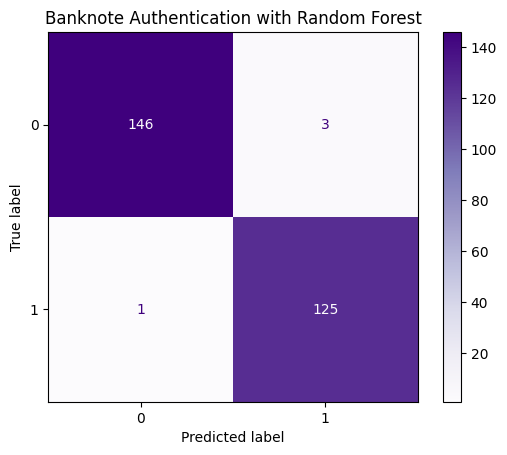

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Purples')
plt.title("Banknote Authentication with Random Forest")
plt.show()

Random Forest method is an excellent choice for forgery authentication, similar to previous algorithms we looked at in this course, like classification. This method is far better than the linear options we did in module 2.

I would recommend Random Forest for finding forgeries because it does as good a job as classification and regression but is also more efficient.